# Проект

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача

    Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:

    Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
    Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
    Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
    Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Информация о колонках в датасете:

1. Hypothesis — краткое описание гипотезы;
2. Reach — охват пользователей по 10-балльной шкале;
3. Impact — влияние на пользователей по 10-балльной шкале;
4. Confidence — уверенность в гипотезе по 10-балльной шкале;
5. Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Импортируем нужные библиотеки, загрузим данные.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import math
from scipy import stats

from datetime import timedelta
import datetime as dt

from statsmodels.stats.proportion import proportions_ztest
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv', sep=',')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150  

data.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датасете присутствет 1 коланка типа Object и 4 колонки типа int64. Всего в датафремйме 9 строк.

In [4]:
#переведем названия столбцов в нижний регистр для удобства
data.columns = [x.lower() for x in data.columns.values]

#### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
data['ICE'] = ((data['impact'] * data['confidence']) / data['efforts']).round(2)

data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE - это гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

#### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    

Добавим полученные значения RICE к существующей таблице. Новый столбец назовем RICE.

In [6]:
data['RICE'] = ((data['reach']*data['impact']*data['confidence']) / data['efforts']).round(2)

data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [7]:
data[['hypothesis', 'ICE', 'RICE']].style.background_gradient('coolwarm')

,hypothesis,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,112
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2


Наиболее перспективные гипотезы по RICE - гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". На первом месте уже гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что ее параметр равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.

#### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Наиболее перспективные гипотезы по ICE (влияние, уверенность, усилия) - это

1. "Запустить акцию, дающую скидку на товар в день рождения"

2. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

3. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

На первом месте гипотеза  
"Запустить акцию, дающую скидку на товар в день рождения". У ее высокие Impact и Confidence. Далее идут гипотезы "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и 
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" - у них также довольно сильные показатели Impact и Confidence. Efforts при этом 5-6.

Наиболее перспективные гипотезы по RICE (влияние, уверенность, усилия,
охват) - это 

1. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

2. "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"

3. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

На первом месте уже гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что ее параметр reach равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.


#### Вывод

Изучен файл с 9 гипотезами по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Применен фреймворк ICE для приоритизации гипотез.
Наиболее перспективные гипотезы по ICE - это гипотезы "Запустить акцию, дающую скидку на товар в день рождения", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей", "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Применен фреймворк RICE для приоритизации гипотез.
Наиболее перспективные гипотезы по RICE - гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа", "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". На первом месте уже гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что ее параметр равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.


### Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Описание данных из /datasets/orders.csv 

    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.

Описание данных из /datasets/visitors.csv

    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста

#### Предобработка данных

Загрузим данные.

In [8]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Датафрейм с заказами состоит из 5 колонок: transactionId типа int64, visitorId типа int64, date типа object, revenue типа int64, group типа object. Дату имеет смысл привести к datetime.

In [11]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [12]:
orders = orders.rename(columns={"transactionId": "orderId", "visitorId": "userId"})

Пробежимся по данным и проверим их на корректность. Для этого воспользуемся методом describe() для численных строк и методами .unique()/.value_counts() для категориальных данных.

In [13]:
orders['orderId'].value_counts()

3574407166    1
2470658885    1
1476831880    1
3709669952    1
2764584088    1
             ..
1168756094    1
1185885568    1
11068804      1
486237576     1
1192185169    1
Name: orderId, Length: 1197, dtype: int64

Всего в датафрейме у нас 1197 транзакций, все уникальные.

In [14]:
orders['userId'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: userId, Length: 1031, dtype: int64

In [15]:
orders['userId'].count()

1197

В датафрейме с заказами у нас фигурирует 1031 уникальных пользователя. Самое большое число заказов по покупателю - 11.
Всего записей также 1197.

In [16]:
orders['date'].value_counts()

2019-08-05    48
2019-08-14    47
2019-08-12    47
2019-08-06    46
2019-08-15    46
2019-08-28    45
2019-08-01    45
2019-08-27    44
2019-08-02    44
2019-08-19    43
2019-08-08    43
2019-08-29    42
2019-08-07    42
2019-08-26    41
2019-08-09    41
2019-08-22    41
2019-08-23    40
2019-08-03    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-11    26
2019-08-18    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

In [17]:
orders['date'].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Представлены заказы за август 2019 года. 1197 строк всего, из них уникальных - 31. Самая часто встречающаяся дата - 2019-08-05, в этот день было совершено 48 заказов.

In [18]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

В колонке с группами тестирования у нас неравное число участников: в группе А - 557 человек, в группе B - 640.

In [19]:
#проверим на дубликаты
orders[orders.duplicated()]

,orderId,userId,date,revenue,group


Дубликатов нет.

In [20]:
#посмотрим на нулевые значения
pd.DataFrame(round((orders.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
orderId,0
userId,0
date,0
revenue,0
group,0


Нулевых значений нет.

Перейдем к данным о посещениях.

In [21]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [22]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Всего у нас 62 строки. Колонка date типа object, колонка group типа object и колонка visitors типа int64. Дату имеет смысл привести к datetime. 

In [23]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Пробежимся по данным и проверим их на корректность. Для этого воспользуемся методом describe() для численных строк и методами .unique()/.value_counts() для категориальных данных.


In [24]:
visitors['date'].describe()

count                      62
unique                     31
top       2019-08-02 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

Всего 62 строки, каждая дата повторяется по 2 раза (для групп А и В), уникальных значений - 31, так же, как и в датафреймес заказами.

In [25]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Записей по группе В у нас 40, по группе А - 22.

In [26]:
visitors['visitors'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

Всего 62 строки с информацией о числе посетителей. Среднее и медиана близки (607 и 62 соотвественно), скорее всего, выбросов сильных нет. Самое большое число посетителей - 770, самое маленькое - 361.

In [27]:
visitors[visitors.duplicated()]

,date,group,visitors


Дубликатов нет.

In [28]:
#посмотрим на нулевые значения
pd.DataFrame(round((visitors.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
date,0
group,0
visitors,0


Нулевых значений не наблюдается.

Проверим, есть ли кто-то из покупателей сразу в двух группах.

In [29]:
gr = orders.pivot_table(index='userId', values='group', aggfunc='nunique')
gr.columns = ['group_count', 'del_col']
gr.reset_index()
gr.query('group_count > 1').count()

group_count    58
del_col        58
dtype: int64

58 пользователей оказались в обоих группах. Делать с ними ничего не будем, так как их мало, и их удаление никак не скажется на результатах тестов.

##### Вывод

Загружены и подготовлены данные для анализа.

Датафрейм с заказами состоит из 5 колонок: transactionId типа int64, visitorId типа int64, date типа object, revenue типа int64, group типа object. Дата переведена в datetime.
Выполнена проверка данных в колонкках на корректность.

Всего в датафрейме у нас 1197 транзакций, все уникальные. В датафрейме у нас фигурирует 1031 уникальных пользователя. Самое большое число заказов по покупателю - 11. 

Представлены заказы за август 2019 года. 1197 строк всего, из них уникальных - 31. Самая часто встречающаяся дата - 2019-08-05, в этот день было совершено 48 заказов.

В колонке с группами тестирования у нас неравное число участников: в группе А - 557 человек, в группе B - 640.
Дубликатов и нулевых значений нет.

Датафрейм с данными о посещениях содержит 62 строки. Колонка date типа object, колонка group типа object и колонка visitors типа int64. Дата приведена к datetime.

Каждая дата в датафрейме повторяется по 2 раза (для групп А и В), уникальных значений - 31, так же, как и в датасете с заказами. Записей по группе В у нас 40, по группе А - 22. 

Среднее и медиана числа посетителей близки (607 и 62 соотвественно), скорее всего, выбросов сильных нет. Самое большое число посетителей - 770, самое маленькое - 361.
Дубликатов и нулевых значений не обнаружено.

Также было проверено, есть ли кто-то из покупателей сразу в двух группах. Оказалось, таких пользователей 58. Делать с ними ничего не будем, так как их мало, и их удаление никак не скажется на результатах тестов.

#### Построение кумулятивных метрик

##### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group' таблицы orders. Избавимся от дубликатов методом drop_duplicates()

In [30]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [31]:
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Объявим переменную ordersAggregated, содержащую:
    дату;
    группу A/B-теста;
    число уникальных заказов в группе теста по указанную дату включительно;
    число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
    суммарную выручку заказов в группе теста по указанную дату включительно.

In [32]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [33]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'orderId': pd.Series.nunique,
            'userId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [34]:
ordersAggregated.head()

,date,group,orderId,userId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Объявим переменную visitorsAggregated, содержащую:

    * дату;
    * группу A/B-теста;
    * количество уникальных посетителей в группе теста по указанную дату включительно.

In [35]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [36]:
# получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [37]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge()

In [38]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [39]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраним данные о датах, выручке и числе заказов в группах A и B.
Построим графики кумулятивной выручки по дням по группам.

In [40]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [41]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


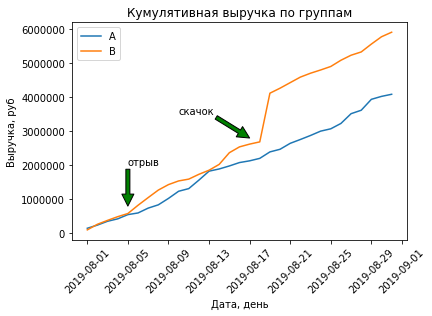

In [42]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата, день')
plt.ylabel('Выручка, руб')
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 

plt.show()

Выручка почти равномерно увеличивается в течение всего теста.
С самого начала сегмент B пошел вверх и лидировал весь тест. В середине августа видим довольно резкий скачок сегмента B. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#####     Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов.

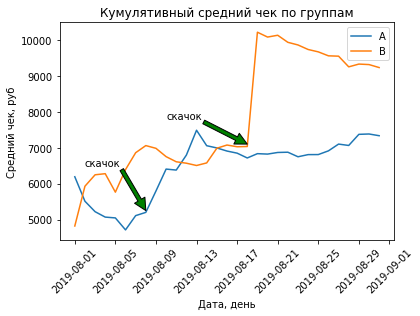

In [43]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата, день')
plt.ylabel('Средний чек, руб')
plt.legend() 
plt.annotate('скачок', xy=('2019-08-18', 7100), xytext=('2019-08-10', 7800),
            arrowprops=dict(facecolor='g'))
plt.annotate('скачок', xy=('2019-08-08', 5250), xytext=('2019-08-02', 6500),
            arrowprops=dict(facecolor='g')) 

plt.show()

Кумулятивное значение среднего чека довольно нестабильно. После 17 августа со средним чеком сегмента В что-то случилось, и он резко увеличился(стал свыше 10000). Пик для семента А пришелся на 13 августа (7000-8000), после чего немного снизился.

Скорее всего, принимать решение по этой метрике рано. Или требуется дополнительный анализ выбросов.

##### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    

Чтобы нагляднее увидеть разницу между группами, строят график относительного различия. Каждую его точку рассчитывают так: кумулятивная метрика группы B / кумулятивная метрика группы A - 1

Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB']. 

Сохраним их в переменной mergedCumulativeRevenue.

In [44]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [45]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Построим график относительного различия кумулятивного среднего чека группы B к группе A.

Добавим пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().

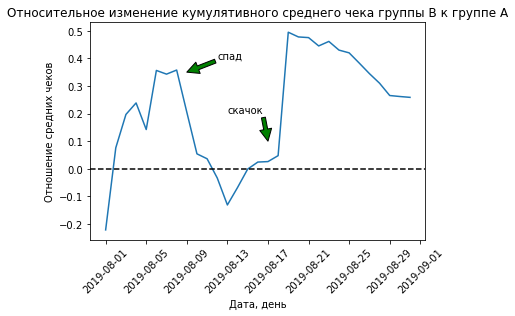

In [46]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата, день')
plt.ylabel('Отношение средних чеков')
plt.annotate('скачок', xy=('2019-08-17', 0.1), xytext=('2019-08-13', 0.2),
            arrowprops=dict(facecolor='g'))
plt.annotate('спад', xy=('2019-08-09', 0.35), xytext=('2019-08-12', 0.4),
            arrowprops=dict(facecolor='g')) 
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Вероятно, в эти дни были соверешены большие заказы.

##### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
   

Добавим в cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

Объявим переменные cumulativeDataA и cumulativeDataB, в которых сохраним данные о заказах в сегментах A и B соответственно.

Построим графики кумулятивной конверсии по дням по группам.

In [47]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [48]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


In [49]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
 
# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

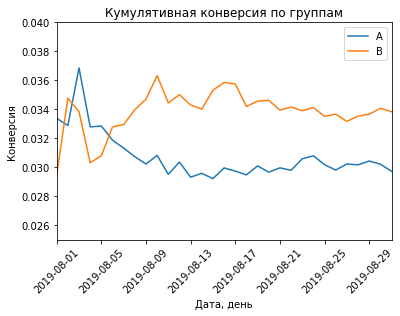

In [50]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title("Кумулятивная конверсия по группам")
plt.xlabel('Дата, день')
plt.ylabel('Конверсия')
 
# задаем масштаб осей
plt.axis(['2019-08-01', '2019-08-31', 0.025, 0.04])

plt.show()

В начале теста сегмент А имел большую конверсию, но после чуть упал и выровнялся до уровня 0.03. Сегмент B наоборот начал с 0.03 и стабилизировася на значении 0.035.

Был изменен масштаб графика, чтобы было видно, что абсолютное значение колебания в начале и в конце теста не слишком большое - от 3 до 4%. Если убрать масштаб осей, будет казаться, что колебания продолжаются, и конверсия не установилась около своего среднего значения.

#####  Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
    

Объединим таблицы cumulativeDataA и cumulativeDataB методом merge() так, чтобы она содержала столбцы: ['date', 'conversionA', 'conversionB']. 

Сохраним это в переменной mergedCumulativeConversions.

In [51]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Построим график относительного различия кумулятивной конверсии группы B к группе A.

Добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). И ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2.

Зададим масштаб осей.

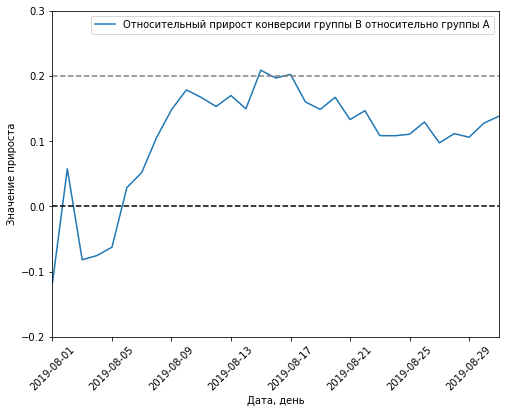

In [52]:
plt.figure(figsize=(8,6))
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
    label="Относительный прирост конверсии группы B относительно группы A"
)
plt.legend()
plt.xlabel('Дата, день')
plt.ylabel('Значение прироста')

plt.xticks(rotation=45)

#Добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). 
plt.axhline(y=0, color='black', linestyle='--')
#И ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.2.
plt.axhline(y=0.2, color='grey', linestyle='--')

plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3])

plt.show()

В начале теста группа B проигрывала группе A, затем вырвалась резко вперёд 2 августа, а потом упала вновь 3 августа. Затем она начала расти вплоть до 15 августа (прирост 20%), после чего стала немного падать до 0.1, но все равно выигрывает по сравнению с группой А.
В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.

##### Вывод

На данном этапе были изучены кумулятисные метрики.

1. Построен график кумулятивной вырчки по сегментам тестирования. 
Выручка почти равномерно увеличивается в течение всего теста.
С самого начала сегмент B пошел вверх и лидировал весь тест. В середине августа видим довольно резкий скачок сегмента B. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.


2. Построены графики среднего чека по группам — для этого выполнено деление кумулятивной выручки на кумулятивное число заказов.
Кумулятивное значение среднего чека довольно нестабильно. После 17 августа со средним чеком сегмента В что-то произошло, и он резко увеличился(стал свыше 10000). Пик для семента А пришелся на 13 августа (7000-8000), после чего немного снизился до 6500.


3. Построен график относительного различия кумулятивного среднего чека группы B к группе A. Каждая его точка рассчитана так: кумулятивная метрика группы B / кумулятивная метрика группы A - 1.
Результаты теста значительно и резко менялись в несколько дат. Вероятно, в эти дни были соверешены большие заказы.


4. Построены графики кумулятивной конверсии по дням по группам.
В начале теста сегмент А имел большую конверсию, но после чуть упал и выровнялся до уровня 0.03. Сегмент B наоборот начал с 0.03 и стабилизировася на значении 0.035.


5. Построен график относительного различия кумулятивной конверсии группы B к группе A.
В начале теста группа B проигрывала группе A, затем вырвалась резко вперёд 2 августа, а потом упала вновь 3 августа. Затем она начала расти вплоть до 15 августа (прирост 20%), после чего стала немного падать до 0.1, но все равно выигрывает по сравнению с группой А. В целом отношение конверсии ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Впрочем, сперва стоит проанализировать аномалии, возможно, они изменят картину.





#### Исследование аномалий

##### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    

In [53]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: 'userId' и 'orders'. Назовем его ordersByUsers.

In [54]:
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Самое большое количество заказов в месяц - 11 от двух пользователей.

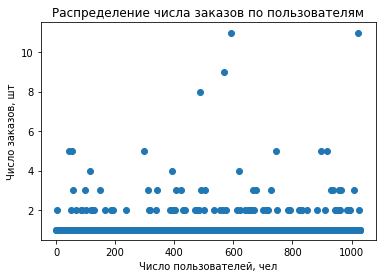

In [55]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 

plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Число заказов, шт')
plt.show()

Пользователей, заказавших более двух раз, не так мало. Они вполне могут быть аномальными.

##### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    

In [56]:
# Метод np.percentile('column', [percentile1, percentile2, percentile3]) находит перцентили.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов.

##### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
   

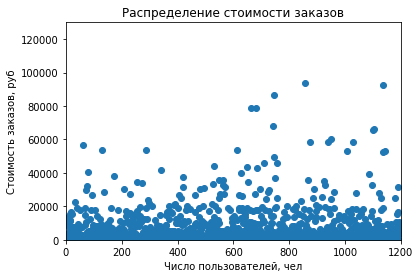

In [57]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue']) 

plt.title('Распределение стоимости заказов')
plt.xlabel('Число пользователей, чел')
plt.ylabel('Стоимость заказов, руб')
plt.axis([0, 1200, 0, 130000])

plt.show()

Есть немного дорогих заказов. Есть выбросы в районе 40-100 т.р.

#####  Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    

In [58]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более, чем у 5% заказов чек дороже 28000. И не больше, чем у 1% заказов чек дороже 58233 т.р.

##### Вывод

На данном этапе были изучены аномалии по количеству заказов и стоимости заказов.

Построен точечный график количества заказов по пользователям. 
Пользователей, заказавших более двух раз, не так мало. Они вполне могут быть аномальными.

Посчитаны 95-й и 99-й перцентили количества заказов на пользователя. 
Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов.

Построен точечный график стоимостей заказов. 
Есть немного дорогих заказов. Есть выбросы в районе 40-100 т.р.

Посчитаны 95-й и 99-й перцентили стоимости заказов.
Не более, чем у 5% заказов чек дороже 28000. И не больше, чем у 1% заказов чек дороже 58233 т.р.


#### Тест

##### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

In [59]:
orders.head()

,orderId,userId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Подготовим данные. Добавим информацию о посещениях в день и о кумулятивном количестве посещений.

In [60]:
# получаем агрегированные кумулятивные по дням данные о посетителях группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [61]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [62]:
# получаем агрегированные кумулятивные по дням данные о посетителях группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [63]:
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
visitorsBCummulative.head()

,date,visitorsCummulativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [64]:
# получаем агрегированные по дням данные о заказах и выручке группы А
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [65]:
# получаем кумулятивные по дням данные о заказах и выручке группы А
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [66]:
# получаем агрегированные по дням данные о заказах и выручке группы В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'orderId', 'userId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'orderId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()


,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [67]:
# получаем кумулятивные по дням данные о заказах и выручке группы В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [68]:
# Объединяем по дате все полученные кумулятивные данные в один датафрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные ordersByUsersA и ordersByUsersB. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [69]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [70]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('userId', as_index=False)
    .agg({'orderId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [71]:
#в sampleA сохраняем выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. 
# число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleA.count()

18736

In [72]:
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB.count()

18916

Получили Series с 18916 значений.

Сформулируем гипотезы

Н0 - различия в конверсиях между группами по «сырым» данным статистически не значимы

Н1 - различия в конверсиях между группами по «сырым» данным статистически значимы

Пороговое значение alpha примем за 5%.

У реализации метода Манн-Уитни в python есть одна особенность: его базовые настройки в python не предполагают проверку двухсторонней гипотезы, а это не соответствует гипотезам, проверяемым в проекте. Для корректной работы метода необходимо задать его параметр alternative = 'two-sided'

В сам тест добавим mannwhitneyu(одно, второе, alternative = 'two-sided'). Тогда тест будет значть, что гипотеза двустороняя? и вернет целый p-value. Если мы не указываем этот параметр, тест думает, что гипотеза одностороняя, и возвращает только половину p-value.

In [73]:
p_val_conversion = (stats.mannwhitneyu(sampleA, sampleB,alternative = 'two-sided')[1]).round(5)

print("P-value по конверсии до очистки данных: {0:.3f}".format(p_val_conversion))


P-value по конверсии до очистки данных: 0.017


In [74]:
relative_increase_conversion = sampleB.mean() / sampleA.mean() - 1
print("Относительный прирост конверсии группы B: {0:.3f}".format(relative_increase_conversion))

Относительный прирост конверсии группы B: 0.138


In [75]:
alpha = .05

if (p_val_conversion < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


P-value  значительно меньше 0.05, поэтому нулевую гипотезу отвергаем.
Анализ сырых данных показывает, что в конверсии между группами есть статистически значимые различия.
Относительный прирост конверсии группы B к конверсии группы А равен 13%.

##### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сравним средние чеки по "сырым" данным.

Сформулируем гипотезы

Н0 - различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «сырым» данным статистически значимы

Пороговое значение alpha примем за 5%.

Гипотеза у нас двусторонняя (есть нулевая и альтернативная), поэтому добавим в них параметр alternative = 'two-sided'.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов. 

In [76]:
revenue_A = orders[orders['group']=='A']['revenue']

In [77]:
revenue_B = orders[orders['group']=='B']['revenue']

In [78]:
p_val_avg_check = (stats.mannwhitneyu(revenue_A, revenue_B,alternative = 'two-sided')[1]).round(3)

print('P-value по среднему чеку до очистки данных: {}'.format(p_val_avg_check))

P-value по среднему чеку до очистки данных: 0.729


In [79]:
relative_increase_avg_check = revenue_B.mean() / revenue_A.mean() - 1

print('Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных: {:.2f}'.format(relative_increase_avg_check))

Относительный прирост среднего чека группы B к среднему чеку группы А до очистки данных: 0.26


In [80]:
alpha = .05

if (p_val_avg_check < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

Не получилось отвергнуть нулевую гипотезу


P-value больше 0.05 - статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет.
Относительное различие среднего чека между группами всего 2.6%.

##### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
    

Приступим к анализу аномалий.

95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям.

95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя. 

Примем за аномальных пользователей тех, кто совершил 4 заказа и более, или совершил заказ на сумму свыше 30 000 рублей. 

Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

Сделаем срезы пользователей с числом заказов 4 и более — usersWithManyOrders и пользователей, совершивших заказы дороже 30 000 — usersWithExpensiveOrders.

In [81]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)

In [82]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['userId']

Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию. 

In [83]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: userId, dtype: int64

Получили множество аномальных пользователей. После их удаления можно считать статистическую значимость.

Сформулируем гипотезы

Н0 - различия в конверсии между группами по «очищенным» данным статистически не значимы

Н1 - различия в конверсии между группами по «очищенным» данным статистически значимы

Пороговое значение alpha примем за 5%.

Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей. 

In [84]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [85]:
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Выведем p-value для сравнения конверсии между очищенными группами. 

Выведем относительный прирост конверсии очищенной группы B.

Гипотеза у нас двусторонняя (есть нулевая и альтернативная), поэтому добавим в них параметр alternative = 'two-sided'.

In [86]:
p_val_conversion_clean = (stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]).round(5)

print('P-value по конверсии после очистки данных: {}'.format(p_val_conversion_clean))

P-value по конверсии после очистки данных: 0.01832


In [87]:
relative_increase_conversion_clean = sampleBFiltered.mean()/sampleAFiltered.mean()-1

print('Относительный прирост конверсии группы B к конверсии группы А после очистки данных: {:.2f}'.format(relative_increase_conversion_clean))

Относительный прирост конверсии группы B к конверсии группы А после очистки данных: 0.15


In [88]:
alpha = .05

if (p_val_conversion_clean < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    


Отвергаем нулевую гипотезу


Как и в случае с сырыми данными, статистическая значимость достигнута. Отвергаем нулевую гипотезу. Сегмент B лучше сегмента А. Относительный прирост конверсии очищенной группы B к А увеличился на 2% и равен 15%

##### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

Сформулируем гипотезы

Н0 - различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы

Пороговое значение alpha примем за 5%.

Гипотеза у нас двусторонняя (есть нулевая и альтернативная), поэтому добавим в них параметр alternative = 'two-sided'.

In [89]:
#отфильтруем аномальных пользователей
sampleAFiltered_revenue = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue']

sampleBFiltered_revenue = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['userId'].isin(abnormalUsers)),
                )
            ]['revenue']

In [90]:
p_val_avg_check_clean = (stats.mannwhitneyu(
    sampleAFiltered_revenue, 
    sampleBFiltered_revenue, 
    alternative = 'two-sided')[1]).round(5)

print('P-value по среднему чеку после очистки данных: {:.3f}'.format(p_val_avg_check_clean))

P-value по среднему чеку после очистки данных: 0.958


In [91]:
relative_increase_avg_check_clean = sampleBFiltered_revenue.mean()/sampleAFiltered_revenue.mean()-1

print('Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: {:.2f}'.format(relative_increase_avg_check_clean))

Относительный прирост среднего чека группы B к среднему чеку группы А после очистки данных: -0.02


In [92]:
alpha = .05

if (p_val_avg_check_clean < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    


Не получилось отвергнуть нулевую гипотезу


Статистической значимости различия между средними чеками не появилось. P-value увеличился до 0.958, а разница между сегментами стала -0.02.

##### Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Опираясь на полученные результаты и несмотря на то, что по среднему чеку статистической значимости не обнаружено, нужно остановить тест и зафиксировать победу группы В.
Группа B статистически значимо лучше группы A по метрике конверсии, но различий в средних чеках нет.
Так как задача стоит в эффективности гипотезы по увеличению выручки, нужно смотреть на конверсию.
Выручка не всегда покажет положительную или отрицательную динамику, точнее сложно понять по выручке, без учета числа покупателей.

Коверсия влияет на выручку, и поэтому раз конверсия в случае группы В значимо увеличилась, то и выручка увеличилась тоже.
Даже с учетом того, что средний чек остался без изменений.

##### Вывод

1. Посчитана статистическая значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Подготовлены данные. Добавлена информация о посещениях в день и о кумулятивном количестве посещений.

Сформулированы гипотезы:

Н0 - различия в конверсиях между группами по «сырым» данным статистически не значимы

Н1 - различия в конверсиях между группами по «сырым» данным статистически значимы

Пороговое значение alpha принято за 5%.

По результатам теста, P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. 
Анализ сырых данных показывает, что в конверсии между группами есть статистически значимые различия. 
Относительный прирост конверсии группы B к конверсии группы А равен 13%.

----

2. Выполнено сравнение средних чеков по "сырым" данным.

Сформулированы гипотезы:

Н0 - различия в среднем чеке заказа между группами по «сырым» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «сырым» данным статистически значимы

По резльтатам выявлено, что P-value оказался больше 0.05 - статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет. 
Относительное различие среднего чека между группами всего 2.6%.

----

3. Выполнен анализ аномалий.

95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям.
95-й и 99-й перцентили числа заказов на одного пользователя равны 2 и 4 заказам на пользователя.

За аномальных пользователей приняты те, кто совершил 4 заказа и более или совершил заказ на сумму свыше 30 000 рублей.
Так было убрано 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

Сформулированы гипотезы:

Н0 - различия в конверсии между группами по «очищенным» данным статистически не значимы

Н1 - различия в конверсии между группами по «очищенным» данным статистически значимы

По результатам выяснено, что как и в случае с сырыми данными, статистическая значимость достигнута. 
Отвергаем нулевую гипотезу. Сегмент B лучше сегмента А. Относительный прирост конверсии очищенной группы B к А стал равен 15%.

----

4. Посчитана статистическая значимость различия средних чеков после удаления аномальных пользователей.

Сформулированы гипотезы:

Н0 - различия в среднем чеке заказа между группами по «очищенным» данным статистически не значимы

Н1 - различия в среднем чеке заказа между группами по «очищенным» данным статистически значимы

По результатам теста статистической значимости различия между средними чеками не появилось. 
P-value увеличился до 0.958, а разница между сегментами стала -0.02.

----

5. Принято решение по результатам теста.

Опираясь на полученные результаты и несмотря на то, что по среднему чеку статистической значимости не обнаружено, рекомендовано остановить тест и зафиксировать победу группы В. Группа B статистически значимо лучше группы A по метрике конверсии, но различий в средних чеках нет. Так как задача стоит в эффективности гипотезы по увеличению выручки, следует обратить внимание на конверсию. Выручка не всегда покажет положительную или отрицательную динамику, точнее сложно понять по выручке, без учета числа покупателей.

Коверсия влияет на выручку, и поэтому раз конверсия в случае группы В значимо увеличилась, то и выручка увеличилась тоже. Даже с учетом того, что средний чек остался без изменений.

### Общий вывод

В первой части проекта было изучено 9 гипотез и выполнена приоритизация с помощью фреймворков ICE и RICE.
Наиболее перспективная гипотеза по ICE (влияние, уверенность, усилия) - это "Запустить акцию, дающую скидку на товар в день рождения". У ее высокие Impact и Confidence. 

Наиболее перспективная гипотеза по RICE (влияние, уверенность, усилия, охват) - гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Так получилось, потому что ее параметр reach равен 10, в то время как у остальных гипотез он меньше. Reach помогает нам понять, как много пользователей затронет гипотеза.

----
Во второй части проекта выполнен анализ результатов AB-теста, который был проведен с целью увеличения выручки.

1. Изучены входные данные. 

Представлены заказы за август 2019 года. Всего в датафрейме с заказами 1197 транзакций, все уникальные. В выгрузке фигурирует 1031 уникальных пользователя. Самое большое число заказов по покупателю - 11. Самая часто встречающаяся дата - 2019-08-05, в этот день было совершено 48 заказов.
Каждая дата в датафрейме повторяется по 2 раза (для групп А и В), уникальных значений - 31, так же, как и в датасете с заказами.

Было проверено, есть ли кто-то из покупателей сразу в двух группах. Оказалось, таких пользователей 58. Делать с ними ничего не будем, так как их мало, и их удаление никак не скажется на результатах тестов.

2. Изучены кумулятивные метрики.

Кумулятивная выручка почти равномерно увеличивается в течение всего теста. С самого начала сегмент B пошел вверх и лидировал весь тест. В середине августа видим довольно резкий скачок сегмента B. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

Кумулятивное значение среднего чека довольно нестабильно. После 17 августа со средним чеком сегмента В что-то произошло, и он резко увеличился (стал свыше 10000). Пик для семента А пришелся на 13 августа (7000-8000), после чего немного снизился до 6500.

Изучена кумулятивная конверсия по дням по группам. В начале теста сегмент А имел большую конверсию, но после чуть упал и выровнялся до уровня 0.03. Сегмент B наоборот начал с 0.03 и стабилизировася на значении 0.035.

Проанализоровано относительное различие кумулятивной конверсии группы B к группе A. 
Кумулятивная конверсия группы B выигрывает по сравнению с группой А. 
В начале теста группа B проигрывала группе A, после вырвалась резко вперёд 2 августа, а далее упала вновь 3 августа. Затем она начала расти вплоть до 15 августа (прирост 20%), после чего стала немного падать до 0.1.

3. Изучены аномалии по количеству заказов и стоимости заказов.

Пользователей, заказавших более двух раз, не так мало.
Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше четырех заказов.

В выборке есть немного дорогих заказов. Присуствуют выбросы в районе 40-100 т.р.
Не более, чем у 5% заказов чек дороже 28000. И не больше, чем у 1% заказов чек дороже 58233 т.р.

4. Изучена статистическая сначимость различий в среднем чеке и конверсии по "сырым" и очищенным данным.

Получены такие результаты:
    -  в конверсии между группами по "сырым" данным есть статистически значимые различия. Относительный прирост конверсии группы B к конверсии группы А равен 13%.
    -  статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет. Относительное различие среднего чека между группами всего 2.6%.

Выполнен анализ аномалий.

За аномальных пользователей приняты те, кто совершил 4 заказа и более или совершил заказ на сумму свыше 30 000 рублей. Так было убрано 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

После очистки данных получены такие результаты:
    - как и в случае с сырыми данными, статистическая значимость в конверсии между группами достигнута. Сегмент B лучше сегмента А. Относительный прирост конверсии группы B к А стал равен 15%.
    - статистической значимости различия между средними чеками не появилось. P-value увеличился до 0.958, а разница между сегментами стала -0.02.

5. Принято решение по результатам теста.

Опираясь на полученные результаты и несмотря на то, что по среднему чеку статистической значимости не обнаружено, рекомендовано остановить тест и зафиксировать победу группы В. Группа B статистически значимо лучше группы A по метрике конверсии, но различий в средних чеках нет. Так как задача стоит в эффективности гипотезы по увеличению выручки, следует обратить внимание на конверсию. 

Коверсия влияет на выручку, и поэтому раз конверсия в случае группы В значимо увеличилась, то и выручка увеличилась тоже. Даже с учетом того, что средний чек остался без изменений.